Bu ödevde, bir önceki derste Titanic verileri ile oluşturduğunuz modelin performansını ölçeceksiniz. Bu ödevi tamamlamak için, aşağıdaki görevlerin çözümlerini içeren bir Jupyter not defterini link olarak gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

    Modelinizin performansına bu derste öğrendiğiniz metriklerlerle değerlendiriniz.
    ROC eğrisi ve Hassasiyet/Duyarlılık Eğrisini farklı "c" değerleri için çizdirin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, PolynomialFeatures
import warnings; warnings.filterwarnings("ignore")
train_data = pd.read_csv("traintitanic.csv")
train_data.isnull().sum()*100/train_data.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [2]:
train_data["Age"].fillna(train_data["Age"].mean(), inplace=True)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [3]:
train_data = pd.get_dummies(train_data, columns = ['Sex','Embarked',"Pclass"],drop_first=True)

In [4]:
y = train_data["Survived"]
X = train_data.drop(columns = ["PassengerId","Survived","Name","Ticket","Cabin"])


In [11]:
log_reg = LogisticRegression()
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.33, random_state=111)
log_reg_mnm.fit(X_eğitim, y_eğitim)
tahmin_eğitim = log_reg_mnm.predict(X_eğitim)
tahmin_test = log_reg_mnm.predict(X_test)

In [14]:
tahmin_test_ihtimal = log_reg_mnm.predict_proba(X_test)[:,1]
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)

In [15]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[317  49]
 [ 70 160]]
Hata Matrisi (Test verileri)
------------------------------
[[159  24]
 [ 36  76]]


In [16]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 159
Doğru pozitif sayısı   : 76
Yanlış pozitif sayısı  : 24
Yanlış negatif sayısı  : 36


In [23]:
from sklearn.metrics import accuracy_score

print("Modelden alınan doğruluk değeri : ",  log_reg_mnm.score(X_test, y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() değeri         : ",  accuracy_score(y_test, tahmin_test))

Modelden alınan doğruluk değeri :  0.7966101694915254
Hesaplanan doğruluk değeri      :  0.7966101694915254
accuracy_score() değeri         :  0.7966101694915254


In [24]:
from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))
print("precision_score() değeri        : ",  precision_score(y_test, tahmin_test))

Hesaplanan doğruluk değeri      :  0.76
precision_score() değeri        :  0.76


In [25]:
from sklearn.metrics import recall_score

print("Hesaplanan doğruluk değeri   : ",  (TP)/(TP + FN))
print("recall_score() değeri        : ",  recall_score(y_test, tahmin_test))

Hesaplanan doğruluk değeri   :  0.6785714285714286
recall_score() değeri        :  0.6785714285714286


In [26]:
print("Hesaplanan özgünlük değeri   : ",  (TN)/(TN + FP))


Hesaplanan özgünlük değeri   :  0.8688524590163934


In [27]:
from sklearn.metrics import f1_score

hassasiyet_degeri = precision_score(y_test, tahmin_test)
duyarlılık_değeri = recall_score(y_test, tahmin_test)


print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(y_test, tahmin_test))

Hesaplanan f1 skoru   :  0.7169811320754718
f1_score() değeri     :  0.7169811320754718


In [28]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,tahmin_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(y_test, tahmin_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test, tahmin_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test, tahmin_test)))
print('\n')

metrikler =  precision_recall_fscore_support(y_test, tahmin_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       183
           1       0.76      0.68      0.72       112

    accuracy                           0.80       295
   macro avg       0.79      0.77      0.78       295
weighted avg       0.79      0.80      0.79       295

f1_score() değeri        : 0.72
recall_score() değeri    : 0.68
precision_score() değeri : 0.76


Hassasiyet : [0.81538462 0.76      ]
Duyarlılık : [0.86885246 0.67857143]
F1 Skoru   : [0.84126984 0.71698113]


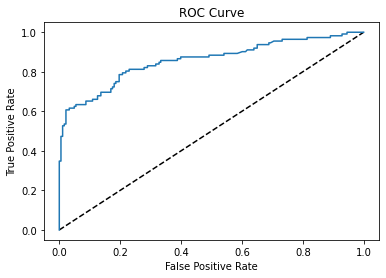

In [29]:
tahmin_test_ihtimal = log_reg_mnm.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [30]:
print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test_ihtimal))


AUC Değeri :  0.8571916471506635


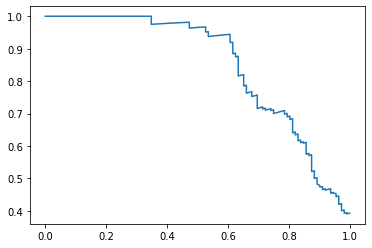

In [31]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.show()

In [32]:
from sklearn.metrics import log_loss

print("Logartimik Kayıp (log-loss) : " , log_loss(y_test, tahmin_test_ihtimal))
print("Hata Oranı                  : " , 1- accuracy_score(y_test, tahmin_test))

Logartimik Kayıp (log-loss) :  0.4335604599530449
Hata Oranı                  :  0.2033898305084746


In [33]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_eğitim, y_eğitim),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)    



,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.687919,0.661017
1,0.010,0.741611,0.725424
2,0.100,0.810403,0.786441
3,1.000,0.802013,0.800000
4,10.000,0.808725,0.796610
5,100.000,0.807047,0.796610
6,1000.000,0.802013,0.796610
